In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from new_function import *
from new_code import *
from code import *

In [2]:
def new_pull_sum_1(A, init_x, h_data, y_data, grad_func, loss_func, grad_f_bar_func, d=784, L=1, rho=0.1, lr=0.1,sigma_n=0.1, max_it=200, mg=1, decay=1):
    n = A.shape[0]
    h, y = h_data, y_data
    x = init_x
    g = grad_func(x, y, h, rho=rho).reshape(x.shape)+sigma_n/mg*np.random.normal(size=(n,d))
    v = g 
    pi=get_left_perron(A).reshape((1,n))
    A0=np.ones((n, 1))@pi@A
    B=get_B(A,9,n)
    correction_vec=np.ones(n)
    gradient_f_bar_x_val = grad_f_bar_func((A0@x).reshape(x.shape), y, h, rho=rho)
    gradient_history=[np.linalg.norm(gradient_f_bar_x_val)]
    v_history=[np.linalg.norm(v)]
    for i in range(max_it):
        
        correction_vec=A.T@correction_vec 
        x = A @ x - lr * np.diag(1/correction_vec) @ v 
        pre_g = g
        gradient=grad_func(x, y, h, rho=rho)
        g = gradient.reshape(x.shape)+sigma_n/mg*np.random.normal(size=(n,d))
        v = B @ v + g - pre_g
        g1=grad_f_bar_func((A0@x).reshape(x.shape), y, h, rho=rho)
        gradient_history.append(np.linalg.norm(g1))
        v_history.append(np.linalg.norm(np.diag(1/correction_vec) @v))

    return gradient_history ,v_history

def pull_sum_1(A, init_x, h_data, y_data, grad_func, loss_func, grad_f_bar_func, d=784, L=1, rho=0.1, lr=0.1,sigma_n=0.1, max_it=200, mg=1, decay=1):
    n = A.shape[0]
    h, y = h_data, y_data
    x = init_x
    W = np.eye(n)
    g = grad_func(x, y, h, rho=rho).reshape(x.shape)+sigma_n/mg*np.random.normal(size=(n,d))
    w = np.linalg.inv(np.diag(np.diag(W)))@g
    v= g
    pi=get_left_perron(A).reshape((1,n))
    A0=np.ones((n, 1))@pi@A
    gradient_f_bar_x_val = grad_f_bar_func((A0@x).reshape(x.shape), y, h, rho=rho)
    gradient_history=[np.linalg.norm(gradient_f_bar_x_val)]
    Ls=[1/min(np.diag(A))]
    v_history=[np.linalg.norm(v)]
    for i in range(max_it):
        W=A@W
        x = A @ x - lr *  v
        gradient=grad_func(x, y, h, rho=rho)
        g = gradient.reshape(x.shape)+sigma_n/mg*np.random.normal(size=(n,d))
        v = A @ v + np.linalg.inv(np.diag(np.diag(W)))@g - w
        w = np.linalg.inv(np.diag(np.diag(W)))@g
        g1=grad_f_bar_func((A0@x).reshape(x.shape), y, h, rho=rho)
        gradient_history.append(np.linalg.norm(g1))
        Ls.append(1/min(np.diag(W)))
        v_history.append(np.linalg.norm(v))

    return gradient_history, v_history, max(Ls)

In [3]:
def pull_sum_AGT(A, init_x, h_data, y_data, grad_func, loss_func, grad_f_bar_func, d=784, L=1, rho=0.1, lr=0.1,sigma_n=0.1, max_it=200, mg=1, decay=1):
    n = A.shape[0]
    h, y = h_data, y_data
    x = init_x
    g = grad_func(x, y, h, rho=rho).reshape(x.shape)+sigma_n/mg*np.random.normal(size=(n,d))
    v = g 
    pi=get_left_perron(A).reshape((1,n))
    A0=np.ones((n, 1))@pi@A
    
    correction_vec=np.ones(n)
    gradient_f_bar_x_val = grad_f_bar_func((A0@x).reshape(x.shape), y, h, rho=rho)
    gradient_history=[np.linalg.norm(gradient_f_bar_x_val)]
    v_history=[np.linalg.norm(v)]
    for i in range(max_it):
        
        correction_vec=A.T@correction_vec 
        x = A @ x - lr * np.diag(1/correction_vec) @ v 
        pre_g = g
        gradient=grad_func(x, y, h, rho=rho)
        g = gradient.reshape(x.shape)+sigma_n/mg*np.random.normal(size=(n,d))
        v = A @ v + g - pre_g
        g1=grad_f_bar_func((A0@x).reshape(x.shape), y, h, rho=rho)
        gradient_history.append(np.linalg.norm(g1))
        v_history.append(np.linalg.norm(np.diag(1/correction_vec) @v))

    return gradient_history ,v_history

def pull_diag_BGT(A, init_x, h_data, y_data, grad_func, loss_func, grad_f_bar_func, d=784, L=1, rho=0.1, lr=0.1,sigma_n=0.1, max_it=200, mg=1, decay=1):
    n = A.shape[0]
    h, y = h_data, y_data
    x = init_x
    W = np.eye(n)
    g = grad_func(x, y, h, rho=rho).reshape(x.shape)+sigma_n/mg*np.random.normal(size=(n,d))
    w = np.linalg.inv(np.diag(np.diag(W)))@g
    v= g
    pi=get_left_perron(A).reshape((1,n))
    A0=np.ones((n, 1))@pi@A
    gradient_f_bar_x_val = grad_f_bar_func((A0@x).reshape(x.shape), y, h, rho=rho)
    gradient_history=[np.linalg.norm(gradient_f_bar_x_val)]
    Ls=[1/min(np.diag(A))]
    v_history=[np.linalg.norm(v)]
    B=get_B(A,9,n)
    for i in range(max_it):
        W=A@W
        x = A @ x - lr *  v
        gradient=grad_func(x, y, h, rho=rho)
        g = gradient.reshape(x.shape)+sigma_n/mg*np.random.normal(size=(n,d))
        v = B @ v + np.linalg.inv(np.diag(np.diag(W)))@g - w
        w = np.linalg.inv(np.diag(np.diag(W)))@g
        g1=grad_f_bar_func((A0@x).reshape(x.shape), y, h, rho=rho)
        gradient_history.append(np.linalg.norm(g1))
        Ls.append(1/min(np.diag(W)))
        v_history.append(np.linalg.norm(v))

    return gradient_history, v_history

In [4]:
def compute_kappa_row(A):
    pi=get_left_perron(A)
    return np.max(pi)/np.min(pi)

def compute_kappa_col(B):
    pi=get_right_perron(B)
    return np.max(pi)/np.min(pi)

#计算第二大特征值的模长
def compute_2st_eig_value(A):
    return abs(np.linalg.eigvals(A)[1])

#计算beta
import numpy as np
import networkx as nx
from mpmath import mp

def compute_beta_row(A, precision=64):
    mp.dps = precision  # 设置计算精度
    n = A.shape[0]
    pi = get_left_perron(A)
    one = np.ones(n)
    if not nx.is_strongly_connected(nx.DiGraph(A)):
        print("不是强联通")
    matrix = A - np.outer(one, pi)
    diag1 = np.diag(np.sqrt(pi))
    diag1_inverse = np.diag(1 / np.sqrt(pi))
    result = np.linalg.norm(diag1 @ matrix @ diag1_inverse, 2)
    return min(result, 1)  # 裁剪结果不超过1

def compute_beta_col(B, precision=64):
    mp.dps = precision  # 设置计算精度
    n = B.shape[0]
    pi = get_right_perron(B)
    one = np.ones(n)
    if not nx.is_strongly_connected(nx.DiGraph(B)):
        print("不是强联通")
    matrix = B - np.outer(pi, one)
    diag1 = np.diag(np.sqrt(pi))
    diag1_inverse = np.diag(1 / np.sqrt(pi))
    result = np.linalg.norm(diag1_inverse @ matrix @ diag1, 2)
    return min(result, 1)  # 裁剪结果不超过1


def compute_S_A_row(A):
    kappa=compute_kappa_row(A)
    beta=compute_beta_row(A)
    n=A.shape[0]
    output=2*np.sqrt(n)*(1+np.log(kappa))/(1-beta)
    return output

def compute_S_B_col(B):
    kappa=compute_kappa_col(B)
    beta=compute_beta_col(B)
    n=B.shape[0]
    output=2*np.sqrt(n)*(1+np.log(kappa))/(1-beta)
    return output

def show_row(A):
    print("A的第二大特征值:",compute_2st_eig_value(A))
    print("A的beta:",compute_beta_row(A))
    print("A的spectral gap:",1-compute_beta_row(A))
    print("A的kappa:",compute_kappa_row(A))
    print("S_A是:",compute_S_A_row(A),"\n")

/Users/wangling/Desktop/程序/new_function.py:95: RuntimeWarning: overflow encountered in exp
  g1[i, j] = sum([-y[i, l] * h[i, l, j] / (1 + np.exp(y[i, l] * np.inner(h[i, l, :], x[i, :]))) for l in range(L)]) / L


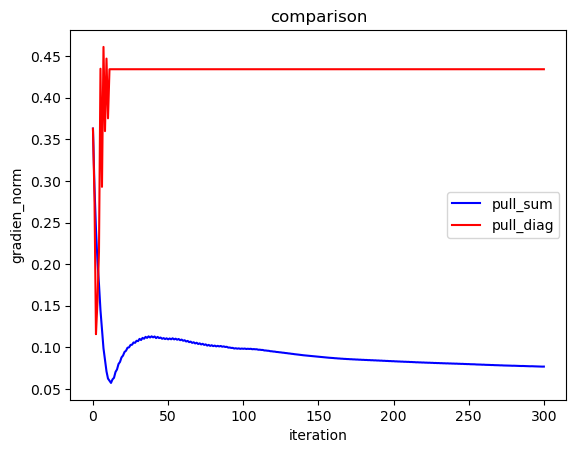

A的第二大特征值: 0.19544084471072107
A的beta: 0.9119181771355718
A的spectral gap: 0.08808182286442823
A的kappa: 19600.19626698839
S_A是: 957.0832748281443 

1/min(diag)最大值是： 6.598952109272772e+17


In [25]:
n=15
d=10
L=200
A=get_xinmeng_like_matrix(n,seed=42).T
init_x=init_x_func(n=n,d=d,seed=42)
h,y,x_opt,x_star=init_data(n=n,d=d,L=L,seed=4989,sigma_h=0.1)
l1=new_pull_sum_1(A, init_x, h, y, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, d=d, L=L, rho=0.1, lr=0.5,sigma_n=0, max_it=300, mg=1, decay=1)
l2=pull_sum_1(A, init_x, h, y, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, d=d, L=L, rho=0.1, lr=0.5,sigma_n=0, max_it=300, mg=1, decay=1)

x0=range(len(l1))
plt.plot(x0, l1, label='pull_sum', color='b')  
plt.plot(x0, l2[0], label='pull_diag', color='r')
plt.title('comparison')
plt.xlabel('iteration')
plt.ylabel('gradien_norm')

# 显示图例
plt.legend()

# 显示图形
plt.show()

show_row(A)
print('1/min(diag)最大值是：', l2[1])


/Users/wangling/Desktop/程序/new_function.py:95: RuntimeWarning: overflow encountered in exp
  g1[i, j] = sum([-y[i, l] * h[i, l, j] / (1 + np.exp(y[i, l] * np.inner(h[i, l, :], x[i, :]))) for l in range(L)]) / L


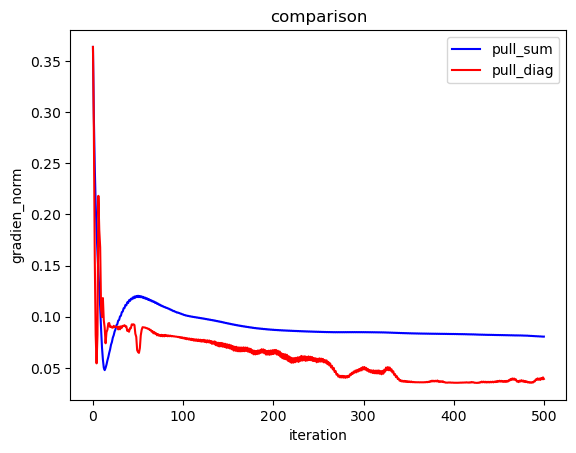

A的第二大特征值: 0.33333333333333326
A的beta: 0.800104901519119
A的spectral gap: 0.19989509848088105
A的kappa: 8192.000000017308
S_A是: 387.92447607768406 

1/min(diag)最大值是： 2391484.5000000014


In [26]:
A=get_xinmeng_matrix(15).T
n=15
d=10
L=200
init_x=init_x_func(n=n,d=d,seed=42)
h,y,x_opt,x_star=init_data(n=n,d=d,L=L,seed=4989,sigma_h=0.1)
l1=new_pull_sum_1(A, init_x, h, y, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, d=d, L=L, rho=0.1, lr=0.5,sigma_n=0, max_it=500, mg=1, decay=1)
l2=pull_sum_1(A, init_x, h, y, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, d=d, L=L, rho=0.1, lr=0.5,sigma_n=0, max_it=500, mg=1, decay=1)

x0=range(len(l1))
plt.plot(x0, l1, label='pull_sum', color='b')  
plt.plot(x0, l2[0], label='pull_diag', color='r')
plt.title('comparison')
plt.xlabel('iteration')
plt.ylabel('gradien_norm')

# 显示图例
plt.legend()

# 显示图形
plt.show()
show_row(A)
print('1/min(diag)最大值是：', l2[1])

/Users/wangling/Desktop/程序/new_function.py:95: RuntimeWarning: overflow encountered in exp
  g1[i, j] = sum([-y[i, l] * h[i, l, j] / (1 + np.exp(y[i, l] * np.inner(h[i, l, :], x[i, :]))) for l in range(L)]) / L


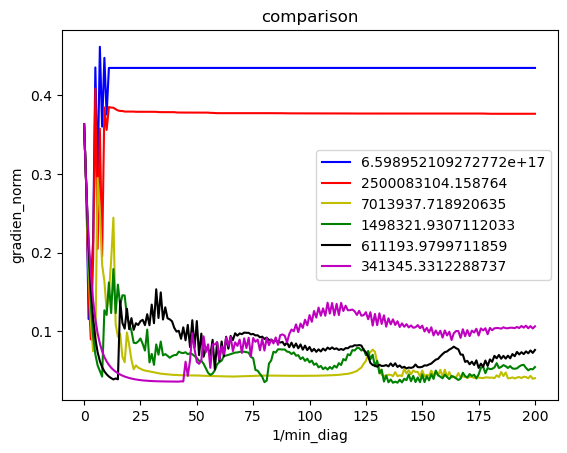

In [27]:
n=15
d=10
L=200
A=get_xinmeng_like_matrix(n,seed=42).T
I=np.eye(n)
init_x=init_x_func(n=n,d=d,seed=42)
h,y,x_opt,x_star=init_data(n=n,d=d,L=L,seed=4989,sigma_h=0.1)
A0=A
A1=1/10*I+9/10*A

A3=3/10*I+7/10*A

A5=1/2*I+1/2*A

A7=7/10*I+3/10*A

A9=9/10*I+1/10*A

s0=pull_sum_1(A0, init_x, h, y, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, d=d, L=L, rho=0.1, lr=0.5,sigma_n=0, max_it=200, mg=1, decay=1)
s1=pull_sum_1(A1, init_x, h, y, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, d=d, L=L, rho=0.1, lr=0.5,sigma_n=0, max_it=200, mg=1, decay=1)

s3=pull_sum_1(A3, init_x, h, y, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, d=d, L=L, rho=0.1, lr=0.5,sigma_n=0, max_it=200, mg=1, decay=1)

s5=pull_sum_1(A5, init_x, h, y, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, d=d, L=L, rho=0.1, lr=0.5,sigma_n=0, max_it=200, mg=1, decay=1)

s7=pull_sum_1(A7, init_x, h, y, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, d=d, L=L, rho=0.1, lr=0.5,sigma_n=0, max_it=200, mg=1, decay=1)

s9=pull_sum_1(A9, init_x, h, y, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, d=d, L=L, rho=0.1, lr=0.5,sigma_n=0, max_it=200, mg=1, decay=1)


plt.plot(range(len(s0[0])), s0[0], label=s0[1], color='b')
plt.plot(range(len(s1[0])), s1[0], label=s1[1], color='r')
plt.plot(range(len(s3[0])), s3[0], label=s3[1], color='y')
plt.plot(range(len(s5[0])), s5[0], label=s5[1], color='g')
plt.plot(range(len(s7[0])), s7[0], label=s7[1], color='k')
plt.plot(range(len(s9[0])), s9[0], label=s9[1], color='m')

plt.title('comparison')
plt.xlabel('1/min_diag')
plt.ylabel('gradien_norm')

# 显示图例
plt.legend()

# 显示图形
plt.show()

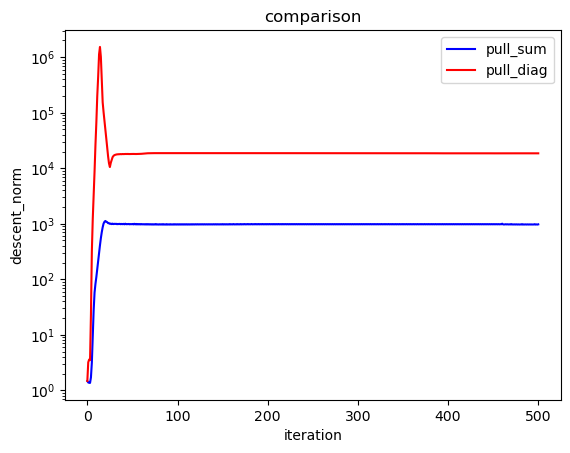

A的第二大特征值: 0.33333333333333326
A的beta: 0.800104901519119
A的spectral gap: 0.19989509848088105
A的kappa: 8192.000000017308
S_A是: 387.92447607768406 

1/min(diag)最大值是： 2391484.5000000014


In [9]:
n=15
d=10
L=200
A=get_xinmeng_matrix(n).T
init_x=init_x_func(n=n,d=d,seed=42)
h,y,x_opt,x_star=init_data(n=n,d=d,L=L,seed=4989,sigma_h=0.1)
l1=new_pull_sum_1(A, init_x, h, y, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, d=d, L=L, rho=0.1, lr=0.5,sigma_n=0, max_it=500, mg=1, decay=1)
l2=pull_sum_1(A, init_x, h, y, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, d=d, L=L, rho=0.1, lr=0.5,sigma_n=0, max_it=500, mg=1, decay=1)

x0=range(len(l1[1]))
plt.plot(x0, l1[1], label='pull_sum', color='b')  
plt.plot(x0, l2[1], label='pull_diag', color='r')
plt.title('comparison')
plt.xlabel('iteration')
plt.ylabel('descent_norm')

# 显示图例
plt.legend()
plt.yscale('log')
# 显示图形
plt.show()

show_row(A)
print('1/min(diag)最大值是：', l2[2])


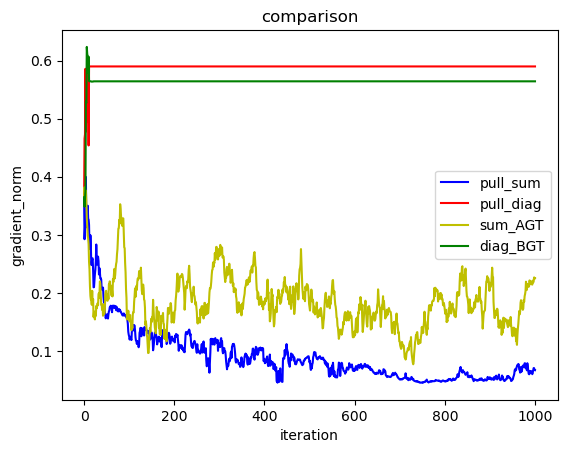

A的第二大特征值: 0.19544084471072107
A的beta: 0.9119181771355718
A的spectral gap: 0.08808182286442823
A的kappa: 19600.19626698839
S_A是: 957.0832748281443 

1/min(diag)最大值是： 6.598952109272772e+17


In [6]:
n=15
d=10
L=200
A=get_xinmeng_like_matrix(n,seed=42).T
init_x=init_x_func(n=n,d=d,seed=42)
h,y,x_opt,x_star=init_data(n=n,d=d,L=L,seed=4989,sigma_h=0)
l1=new_pull_sum_1(A, init_x, h, y, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, d=d, L=L, rho=0.1, lr=0.5,sigma_n=1, max_it=1000, mg=1, decay=1)
l2=pull_sum_1(A, init_x, h, y, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, d=d, L=L, rho=0.1, lr=0.5,sigma_n=1, max_it=1000, mg=1, decay=1)
l3=pull_sum_AGT(A, init_x, h, y, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, d=d, L=L, rho=0.1, lr=0.1,sigma_n=1, max_it=1000, mg=1, decay=1)
l4=pull_diag_BGT(A, init_x, h, y, grad_func=grad, loss_func=loss, grad_f_bar_func=grad_f_bar_x, d=d, L=L, rho=0.1, lr=0.1,sigma_n=1, max_it=1000, mg=1, decay=1)
x0=range(len(l1[1]))
plt.plot(x0, l1[0], label='pull_sum', color='b')  
plt.plot(x0, l2[0], label='pull_diag', color='r')
plt.plot(x0, l3[0], label='sum_AGT', color='y')
plt.plot(x0, l4[0], label='diag_BGT', color='g')
plt.title('comparison')
plt.xlabel('iteration')
plt.ylabel('gradient_norm')

# 显示图例
plt.legend()

# 显示图形
plt.show()

show_row(A)
print('1/min(diag)最大值是：', l2[2])